In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
import plotly.express as px
from datetime import datetime

### 1. Aggregate data to specifc time interval

In [35]:
def aggregate_data(data, aggregate_len):
    data = data.groupby(np.arange(len(data))//aggregate_len).agg( {'timeStamp': 'first', 'flow':lambda x: x.sum(min_count=1), 
                                                                       'siteId':'first', 'description':'first', 
                                                                       'lat':'first', 'lon':'first', 'stage':'first',
                                                                       'easting': 'first', 'northing':'first'})
    return data

### 2. Add stage to each data

In [36]:
def add_stage(data):    
    data['date'] = data['timeStamp'].str.split(' ').str[0]
    data['date'] =  pd.to_datetime(data['date'])
    data['stage'] = 0
    for i in range(len(data)):
        if data['date'][i] < datetime(2023, 6, 1):
            data.loc[data.index == i,'stage'] = 'Before LEZ'
        else:
            data.loc[data.index == i,'stage'] = 'After LEZ'
    return data

### 3. Add index to data

In [37]:
#Add index to data
def add_index(data):
    
    index_len = int(len(data)/671/2+1)
    data_index_list = list(range(index_len))[1:]
    data_index = pd.DataFrame(data_index_list, columns=['dataIndex']) 
    data_all_index = pd.concat([data_index]*671*2, ignore_index=True)
    data_new = pd.concat([data, data_all_index], axis=1)
    
    return data_new

### 4. Plot data

In [38]:
def plot_on_time(data, width, height):
    fig = plt.figure(figsize=(width, height), dpi=300)

    data1 = data.loc[data.stage == 'Before LEZ'][['dataIndex','flow','stage']] # x-axis range
    data2 = data.loc[data.stage == 'After LEZ'][['dataIndex','flow','stage']] # x-axis range

    ax1 = fig.add_subplot(111)
    sns.boxplot(ax=ax1, data=data1, x='dataIndex', y='flow', color='skyblue')
    sns.boxplot(ax=ax1, data=data2, x='dataIndex', y='flow', color='red', boxprops=dict(alpha=.5))
    
    ax1.legend(title='Stage', loc='upper right', labels=['Before LEZ', 'After LEZ'])
    plt.ylabel('Flows',fontsize=16)
    plt.xlabel('Days',fontsize=16)
    # plt.xticks(fontsize=14)                    #设置x轴刻度值的字体大小
    # plt.yticks(fontsize=14)
    
    plt.show() 

In [109]:
def plot_on_detector(data, types, location, height, aspect):
    
    plt.rcParams["figure.dpi"] = 300
    plot_detector = sns.catplot(data=data, kind='box', col='siteId', y='flow', x='stage',
                palette='turbo', height=height, aspect=aspect, col_wrap=20)
    plot_detector.set_ylabels('flow/'+types)
    
    plot_detector.fig.subplots_adjust(top=0.95)
    plot_detector.fig.suptitle(location,fontsize=16)
    
    plt.show()

In [98]:
def plot_on_stage(data, types, location):
    
    figure(figsize=(6, 8), dpi=300)
    sns.boxplot(data=data_hourly_LEZ, x='stage', y='flow',width=.5, showfliers=False).set_title(location)
    plt.ylabel('Flows/'+types)
    
    plt.show()

In [120]:
def plot_average_line(data, width, height,types, leg_location,location):
    
    data_average = data.groupby(['timeStamp'], as_index=False).agg( {'flow':'mean', 'stage':'first', 'dataIndex':'first'})
    
    figure(figsize=(width, height), dpi=300)
    sns.lineplot(x='dataIndex', y='flow', hue='stage', 
             data=data_average, marker='o')
    
    plt.legend(title='Stage', loc=leg_location, labels=['Before LEZ', 'After LEZ'])
    plt.ylabel('Flows',fontsize=16)
    plt.xlabel(types,fontsize=16)
    plt.title(location, fontsize=20)
    
    plt.show()

## Implement

In [52]:
sample_list = pd.read_csv('detector_671.csv').siteId.tolist()
data_list = []
for i in sample_list:
    print(i)
    data = pd.read_csv('SCOOT_671/' + i + '&2023_03_01-08_31&30.csv')
    data = aggregate_data(data, 2)
    data = add_stage(data)
    data_list.append(data)
data_mix = pd.concat(data_list).reset_index(drop=True)

GA0151_A
GA0151_C
GA0151_D
GA0401_R
GA0401_S
GA0401_T
GA0571_N
GA0571_V
GA058A_B
GA058A_C
GA0601_T
GA0601_V
GA0651_A
GA0651_B
GA0651_C
GA0651_D
GA070A_S
GA1051_P
GA1051_S
GA1251_R
GA1251_S
GA1251_T
GA1251_V
GA1301_A
GA1301_G
GA1321_B
GA1321_C
GA1331_V
GA1361_B
GA1361_C
GA1371_R
GA1371_V
GA1501_T
GA1571_Q
GA1571_T
GA1601_A
GA1651_S
GA1651_T
GA1851_A
GA1851_C
GA1851_E
GA1851_F
GA1901_B
GA1951_R
GA2351_T
GA2401_B
GA2401_D
GA2421_W
GA2451_T
GA3221_B
GA3221_D
GA4401_M
GA4401_N
GA4401_Y
GA4451_A
GA4451_C
GA4451_D
GA4501_R
GA4501_T
GA4501_V
GA4551_S
GA4551_T
GA4551_V
GA4701_A
GA4701_D
GA4721_S
GA4721_T
GA4721_V
GA4771_T
GA4771_V
GA4801_A
GA4801_B
GA4801_C
GA4801_D
GA4851_S
GA4851_V
GA4901_R
GA4901_S
GA4971_R
GA4971_S
GA4971_T
GA5151_P
GA5151_R
GA5151_T
GA5151_V
GA5171_B
GA5171_D
GA5201_A
GA5201_B
GA5201_D
GA5251_R
GA5251_T
GA5251_V
GA5351_R
GA5351_T
GA5371_A
GA5371_C
GA5371_D
GA5371_F
GA5401_T
GA5401_V
GA5401_X
GA5451_R
GA5451_S
GA5451_V
GA5451_W
GA5451_X
GA5471_B
GA5471_C
GA5471_D
GA5501_A
G

In [62]:
data_mix_daily = aggregate_data(data_mix, 24)

In [141]:
data_mix_new = add_index(data_mix)
data_mix_daily_new = add_index(data_mix_daily)
data_mix_daily_new

timeStamp    flow    siteId  \
0       2023-03-01 00:00:00   778.0  GA0151_A   
1       2023-03-02 00:00:00   837.0  GA0151_A   
2       2023-03-03 00:00:00   950.0  GA0151_A   
3       2023-03-04 00:00:00   825.0  GA0151_A   
4       2023-03-05 00:00:00   597.0  GA0151_A   
...                     ...     ...       ...   
123459  2023-08-27 00:00:00  1132.0  GL4151_C   
123460  2023-08-28 00:00:00  1194.0  GL4151_C   
123461  2023-08-29 00:00:00   939.0  GL4151_C   
123462  2023-08-30 00:00:00   814.0  GL4151_C   
123463  2023-08-31 00:00:00  1626.0  GL4151_C   

                                        description        lat       lon  \
0       St Vincent Street Eastbound to North Street  55.863144 -4.275053   
1       St Vincent Street Eastbound to North Street  55.863144 -4.275053   
2       St Vincent Street Eastbound to North Street  55.863144 -4.275053   
3       St Vincent Street Eastbound to North Street  55.863144 -4.275053   
4       St Vincent Street Eastbound to North Street  55.863144 -4.275053   
...                                             ...        ...       ...   
123459                             Renfrew Road n/b  55.865333 -4.339927   
123460                             Renfrew Road n/b  55.865333 -4.339927   
123461                             Renfrew Road n/b  55.865333 -4.339927   
123462                             Renfrew Road n/b  55.865333 -4.339927   
123463                             Renfrew Road n/b  55.865333 -4.339927   

             stage     easting    northing  dataIndex  
0       Before LEZ  257716.078  665670.358          1  
1       Before LEZ  257716.078  665670.358          2  
2       Before LEZ  257716.078  665670.358          3  
3       Before LEZ  257716.078  665670.358          4  
4       Before LEZ  257716.078  665670.358          5  
...            ...         ...         ...        ...  
123459   After LEZ  253665.043  666049.406         88  
123460   After LEZ  253665.043  666049.406         89  
123461   After LEZ  253665.043  666049.406         90  
123462   After LEZ  253665.043  666049.406         91  
123463   After LEZ  253665.043  666049.406         92  

[123464 rows x 10 columns]

In [178]:
# data_mix_new.to_csv('flow_hourly_671.csv', index = False)
# data_mix_daily_new.to_csv('flow_daily_671.csv', index = False)

### Read data

In [22]:
data_mix_new = pd.read_csv('flow_hourly_671.csv')
data_mix_daily_new = pd.read_csv('flow_daily_671.csv')

In [24]:
data_list = data_mix_daily_new.siteId.unique().tolist()
LEZ_list = data_in_LEZ.siteId.unique().tolist()
list(set(LEZ_list) - set(data_list))

[]

In [23]:
# Read data in LEZ
data_in_LEZ = gpd.read_file('shp/detector_within_LEZ.shp')
data_in_LEZ = data_in_LEZ[['siteId']]
data_in_LEZ['LEZ'] = 'Yes'
data_in_LEZ

siteId  LEZ
0   GA0401_S  Yes
1   GA0401_T  Yes
2   GA0571_N  Yes
3   GA0571_V  Yes
4   GA058A_B  Yes
..       ...  ...
87  GA5451_S  Yes
88  GA5471_D  Yes
89  GA5601_M  Yes
90  GA5601_N  Yes
91  GG2001_S  Yes

[92 rows x 2 columns]

### Shift the last day (8.31) to the first day After LEZ

In [28]:
data_mix_daily_new.loc[data_mix_daily_new.stage == 'After LEZ', 'dataIndex'] = data_mix_daily_new.loc[data_mix_daily_new.stage == 'After LEZ', 'dataIndex'] + 1
data_mix_daily_new.loc[data_mix_daily_new.timeStamp == '2023-08-31 00:00:00', 'dataIndex'] = 1

In [29]:
data_mix_new.loc[data_mix_new.stage == 'After LEZ', 'dataIndex'] = data_mix_new.loc[data_mix_new.stage == 
                                                                                    'After LEZ', 'dataIndex'] + 24
data_mix_new.loc[(data_mix_new.stage == 'After LEZ') & (data_mix_new.dataIndex >2208), 'dataIndex'] = data_mix_new.loc[data_mix_new.stage == 'After LEZ'].loc[data_mix_new.dataIndex >2208, 'dataIndex'] - 2208

In [143]:
data_daily_demon = data_mix_daily_new.iloc[:184*50,]
data_demon = data_mix_new.iloc[:4416*50,]

### Merge the data in LEZ to all the data

In [30]:
data_mix_daily_new = pd.merge(data_mix_daily_new, data_in_LEZ, how="left", on=["siteId"])
data_mix_daily_new['LEZ'].fillna(value='No',inplace=True)
data_mix_daily_new

timeStamp    flow    siteId  \
0       2023-03-01 00:00:00   778.0  GA0151_A   
1       2023-03-02 00:00:00   837.0  GA0151_A   
2       2023-03-03 00:00:00   950.0  GA0151_A   
3       2023-03-04 00:00:00   825.0  GA0151_A   
4       2023-03-05 00:00:00   597.0  GA0151_A   
...                     ...     ...       ...   
123459  2023-08-27 00:00:00  1132.0  GL4151_C   
123460  2023-08-28 00:00:00  1194.0  GL4151_C   
123461  2023-08-29 00:00:00   939.0  GL4151_C   
123462  2023-08-30 00:00:00   814.0  GL4151_C   
123463  2023-08-31 00:00:00  1626.0  GL4151_C   

                                        description        lat       lon  \
0       St Vincent Street Eastbound to North Street  55.863144 -4.275053   
1       St Vincent Street Eastbound to North Street  55.863144 -4.275053   
2       St Vincent Street Eastbound to North Street  55.863144 -4.275053   
3       St Vincent Street Eastbound to North Street  55.863144 -4.275053   
4       St Vincent Street Eastbound to North Street  55.863144 -4.275053   
...                                             ...        ...       ...   
123459                             Renfrew Road n/b  55.865333 -4.339927   
123460                             Renfrew Road n/b  55.865333 -4.339927   
123461                             Renfrew Road n/b  55.865333 -4.339927   
123462                             Renfrew Road n/b  55.865333 -4.339927   
123463                             Renfrew Road n/b  55.865333 -4.339927   

             stage     easting    northing  dataIndex LEZ  
0       Before LEZ  257716.078  665670.358          1  No  
1       Before LEZ  257716.078  665670.358          2  No  
2       Before LEZ  257716.078  665670.358          3  No  
3       Before LEZ  257716.078  665670.358          4  No  
4       Before LEZ  257716.078  665670.358          5  No  
...            ...         ...         ...        ...  ..  
123459   After LEZ  253665.043  666049.406         89  No  
123460   After LEZ  253665.043  666049.406         90  No  
123461   After LEZ  253665.043  666049.406         91  No  
123462   After LEZ  253665.043  666049.406         92  No  
123463   After LEZ  253665.043  666049.406          1  No  

[123464 rows x 11 columns]

In [47]:
data_mix_new = pd.merge(data_mix_new, data_in_LEZ, how="left", on=["siteId"])
data_mix_new['LEZ'].fillna(value='No',inplace=True)
data_mix_new

timeStamp   flow    siteId  \
0        2023-03-01 00:00:00   10.0  GA0151_A   
1        2023-03-01 01:00:00    8.0  GA0151_A   
2        2023-03-01 02:00:00    4.0  GA0151_A   
3        2023-03-01 03:00:00    2.0  GA0151_A   
4        2023-03-01 04:00:00    2.0  GA0151_A   
...                      ...    ...       ...   
2963131  2023-08-31 19:00:00  114.0  GL4151_C   
2963132  2023-08-31 20:00:00   71.0  GL4151_C   
2963133  2023-08-31 21:00:00   79.0  GL4151_C   
2963134  2023-08-31 22:00:00   71.0  GL4151_C   
2963135  2023-08-31 23:00:00   30.0  GL4151_C   

                                         description        lat       lon  \
0        St Vincent Street Eastbound to North Street  55.863144 -4.275053   
1        St Vincent Street Eastbound to North Street  55.863144 -4.275053   
2        St Vincent Street Eastbound to North Street  55.863144 -4.275053   
3        St Vincent Street Eastbound to North Street  55.863144 -4.275053   
4        St Vincent Street Eastbound to North Street  55.863144 -4.275053   
...                                              ...        ...       ...   
2963131                             Renfrew Road n/b  55.865333 -4.339927   
2963132                             Renfrew Road n/b  55.865333 -4.339927   
2963133                             Renfrew Road n/b  55.865333 -4.339927   
2963134                             Renfrew Road n/b  55.865333 -4.339927   
2963135                             Renfrew Road n/b  55.865333 -4.339927   

            easting    northing        date       stage  dataIndex LEZ  
0        257716.078  665670.358  2023-03-01  Before LEZ          1  No  
1        257716.078  665670.358  2023-03-01  Before LEZ          2  No  
2        257716.078  665670.358  2023-03-01  Before LEZ          3  No  
3        257716.078  665670.358  2023-03-01  Before LEZ          4  No  
4        257716.078  665670.358  2023-03-01  Before LEZ          5  No  
...             ...         ...         ...         ...        ...  ..  
2963131  253665.043  666049.406  2023-08-31   After LEZ         20  No  
2963132  253665.043  666049.406  2023-08-31   After LEZ         21  No  
2963133  253665.043  666049.406  2023-08-31   After LEZ         22  No  
2963134  253665.043  666049.406  2023-08-31   After LEZ         23  No  
2963135  253665.043  666049.406  2023-08-31   After LEZ         24  No  

[2963136 rows x 12 columns]

In [52]:
data_daily_LEZ = data_mix_daily_new.loc[data_mix_daily_new.LEZ == 'Yes']
data_hourly_LEZ = data_mix_new.loc[data_mix_new.LEZ == 'Yes']

data_daily_LEZ_out = data_mix_daily_new.loc[data_mix_daily_new.LEZ == 'No']
data_hourly_LEZ_out = data_mix_new.loc[data_mix_new.LEZ == 'No']

## Plot

In [ ]:
# calculate the sum of traffic flow of each day and plot by timestamp
# calculate the hourly average of each day and plot by timestamp

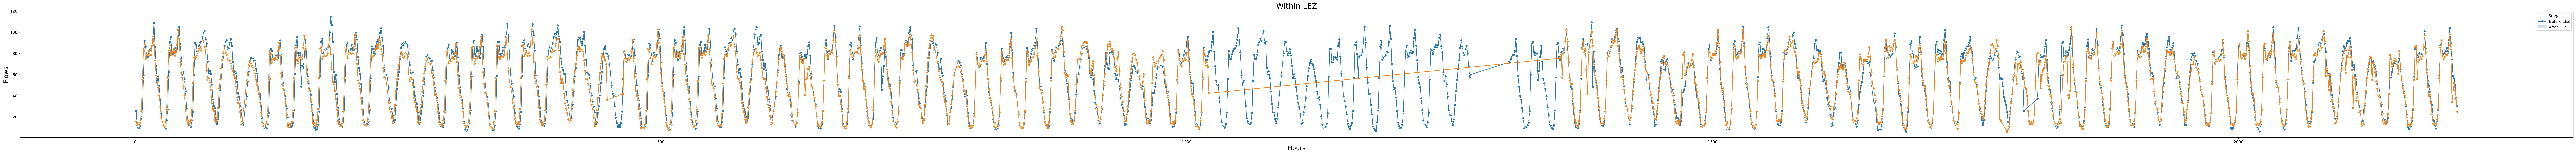

In [122]:
plot_average_line(data_hourly_LEZ, 120,6, 'Hours', 'upper right', 'Within LEZ')

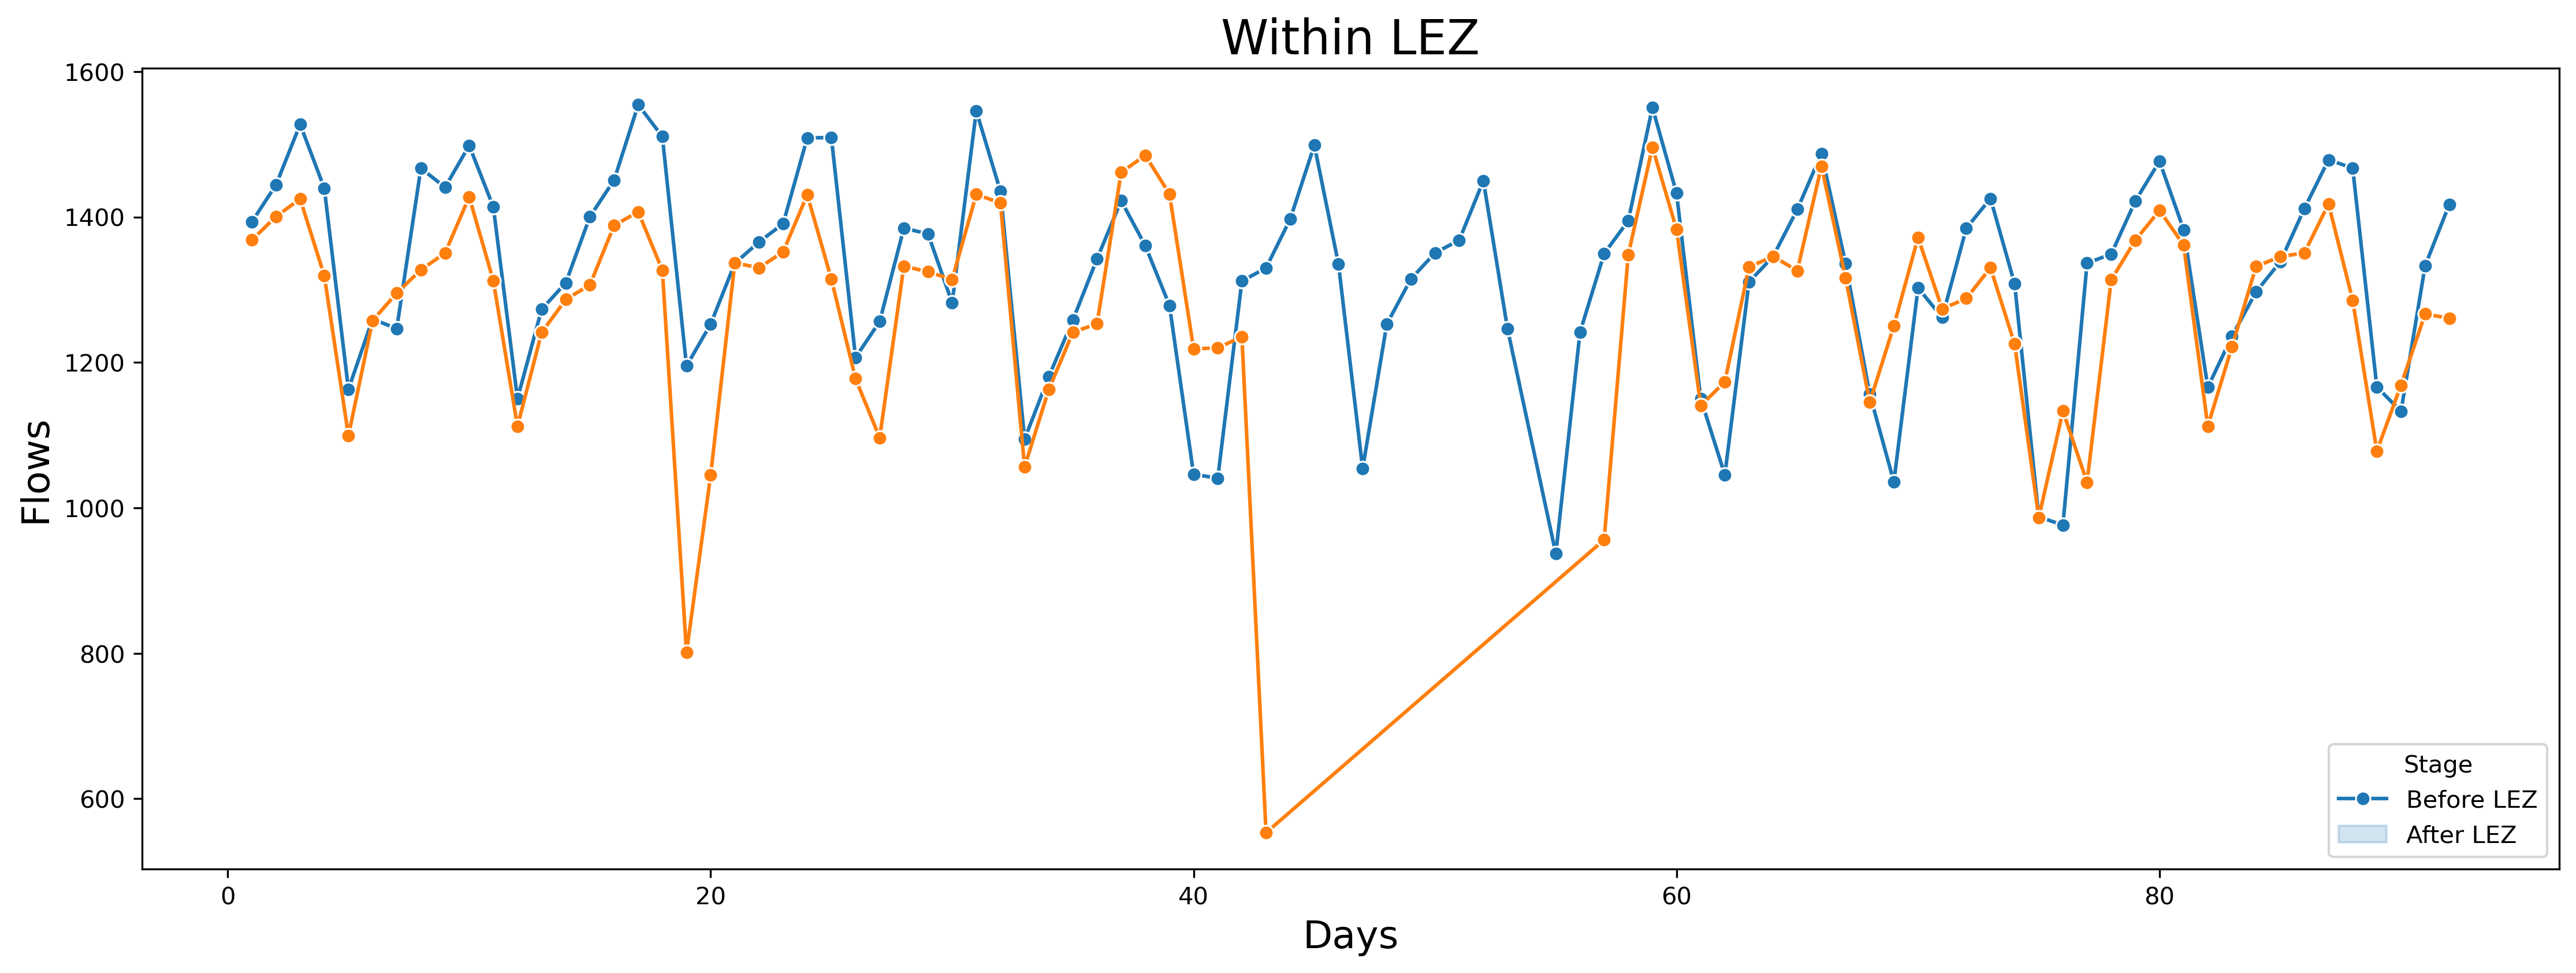

In [121]:
plot_average_line(data_daily_LEZ, 18,6, 'Days','lower right','Within LEZ')

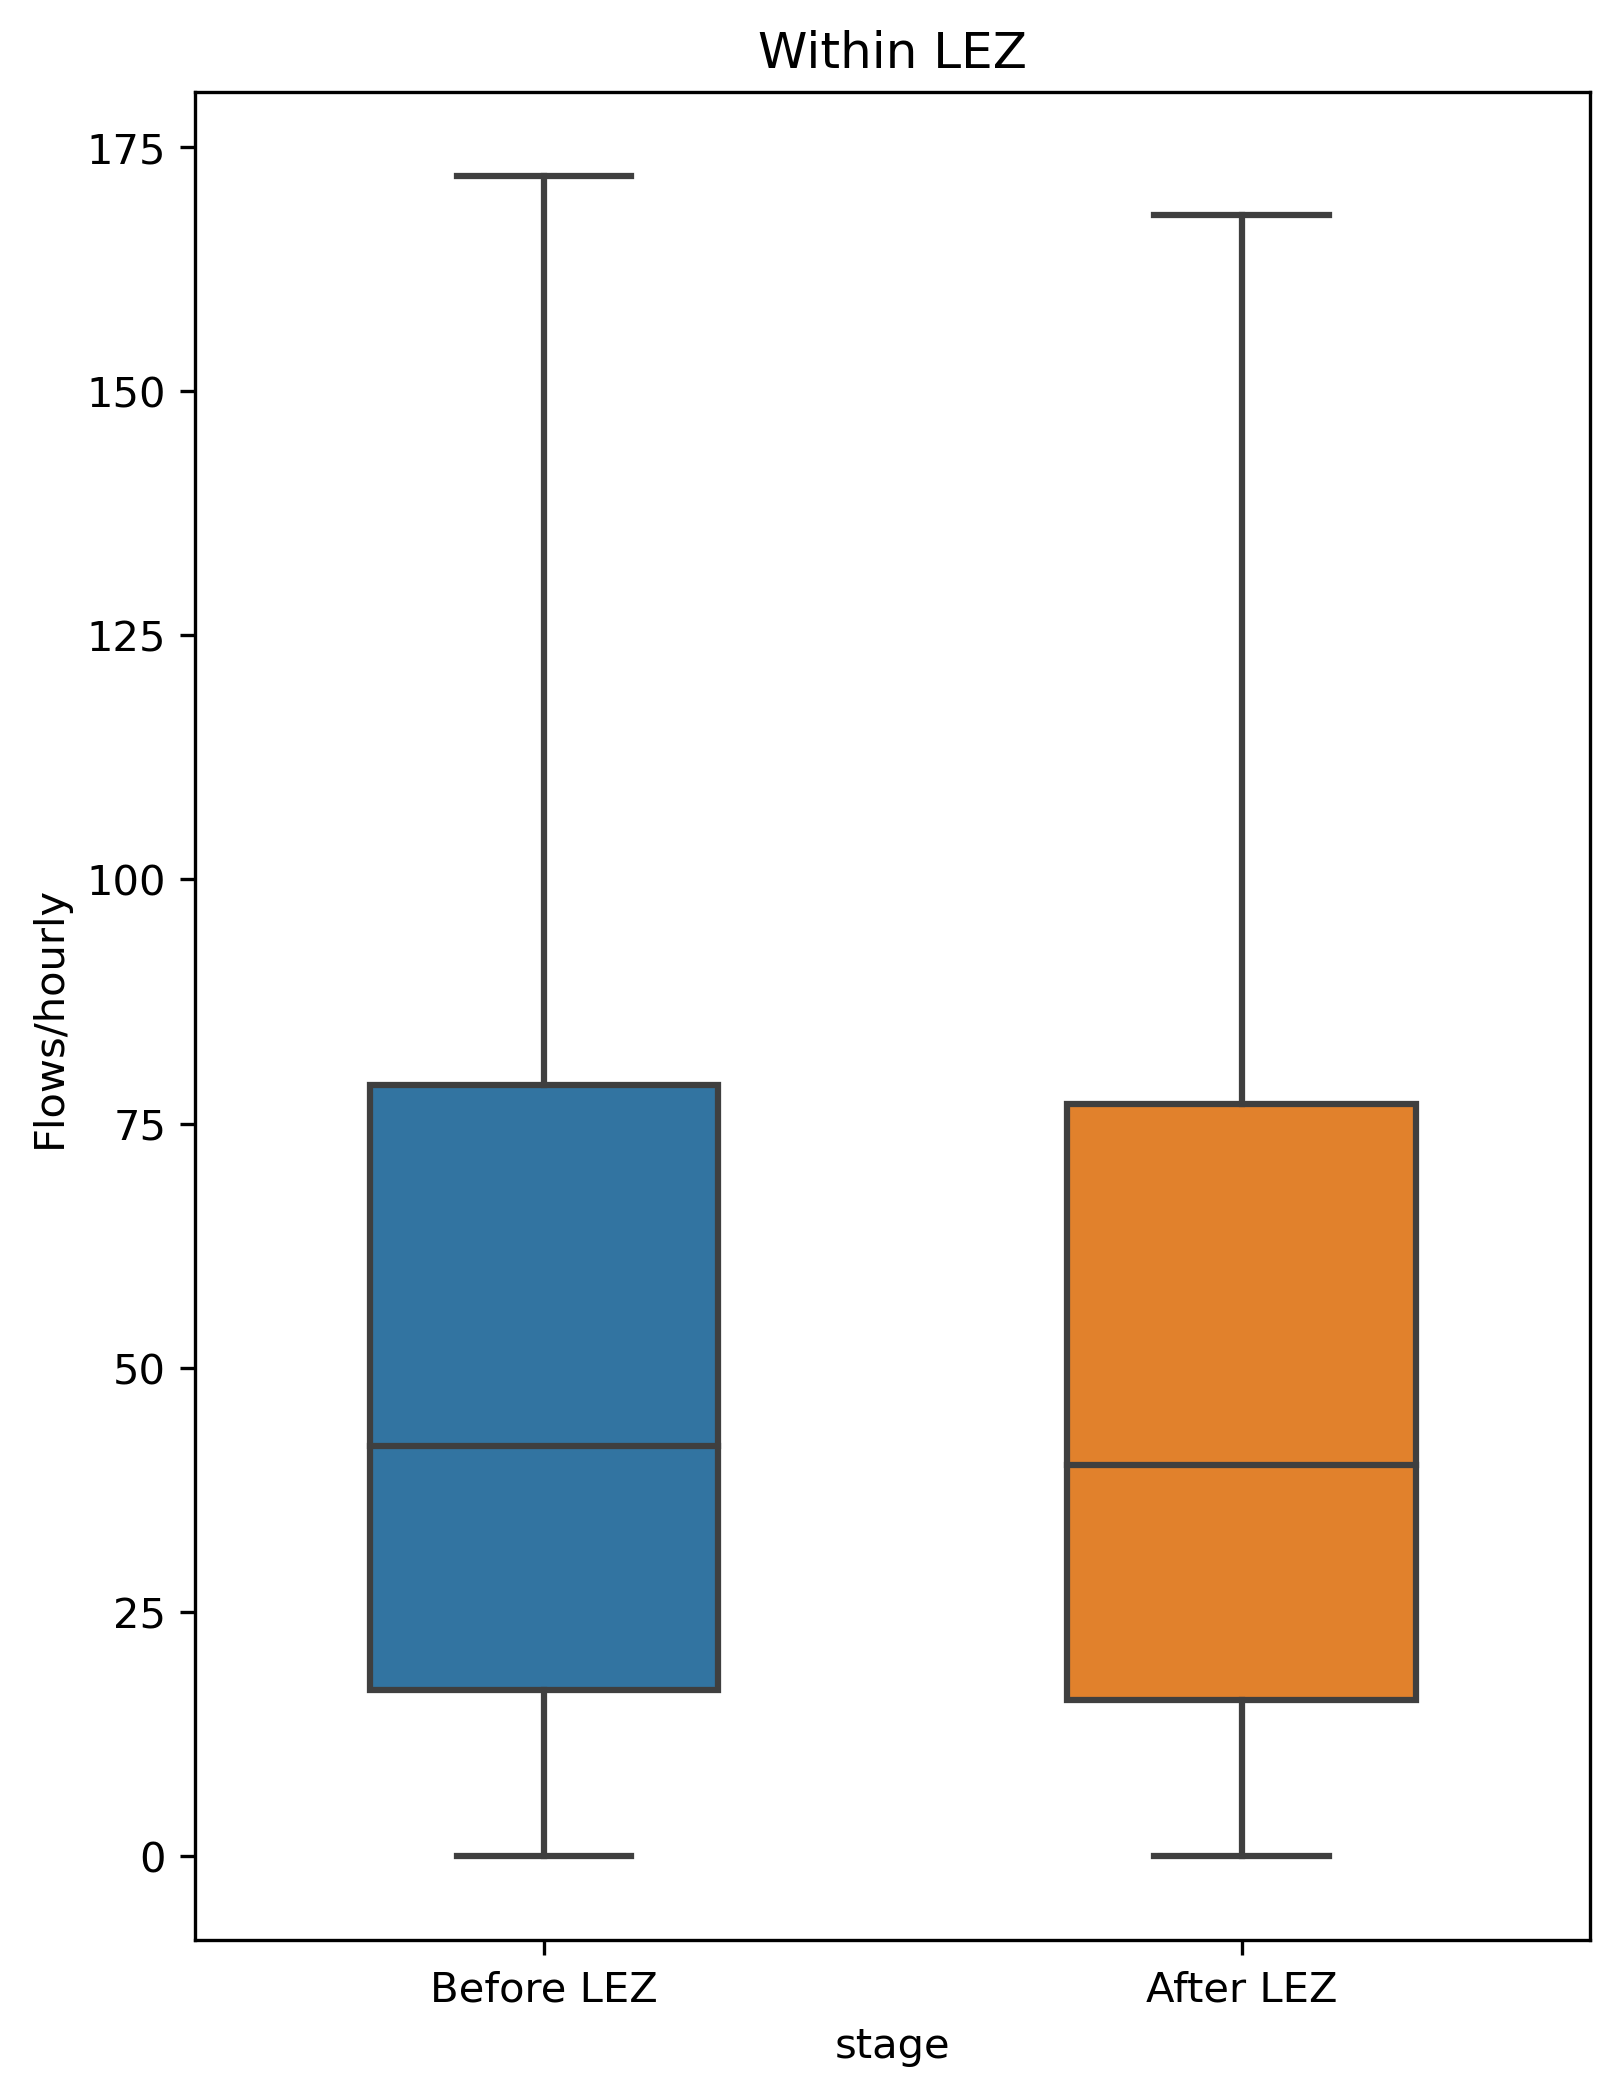

In [99]:
plot_on_stage(data_hourly_LEZ, 'hourly', 'Within LEZ')

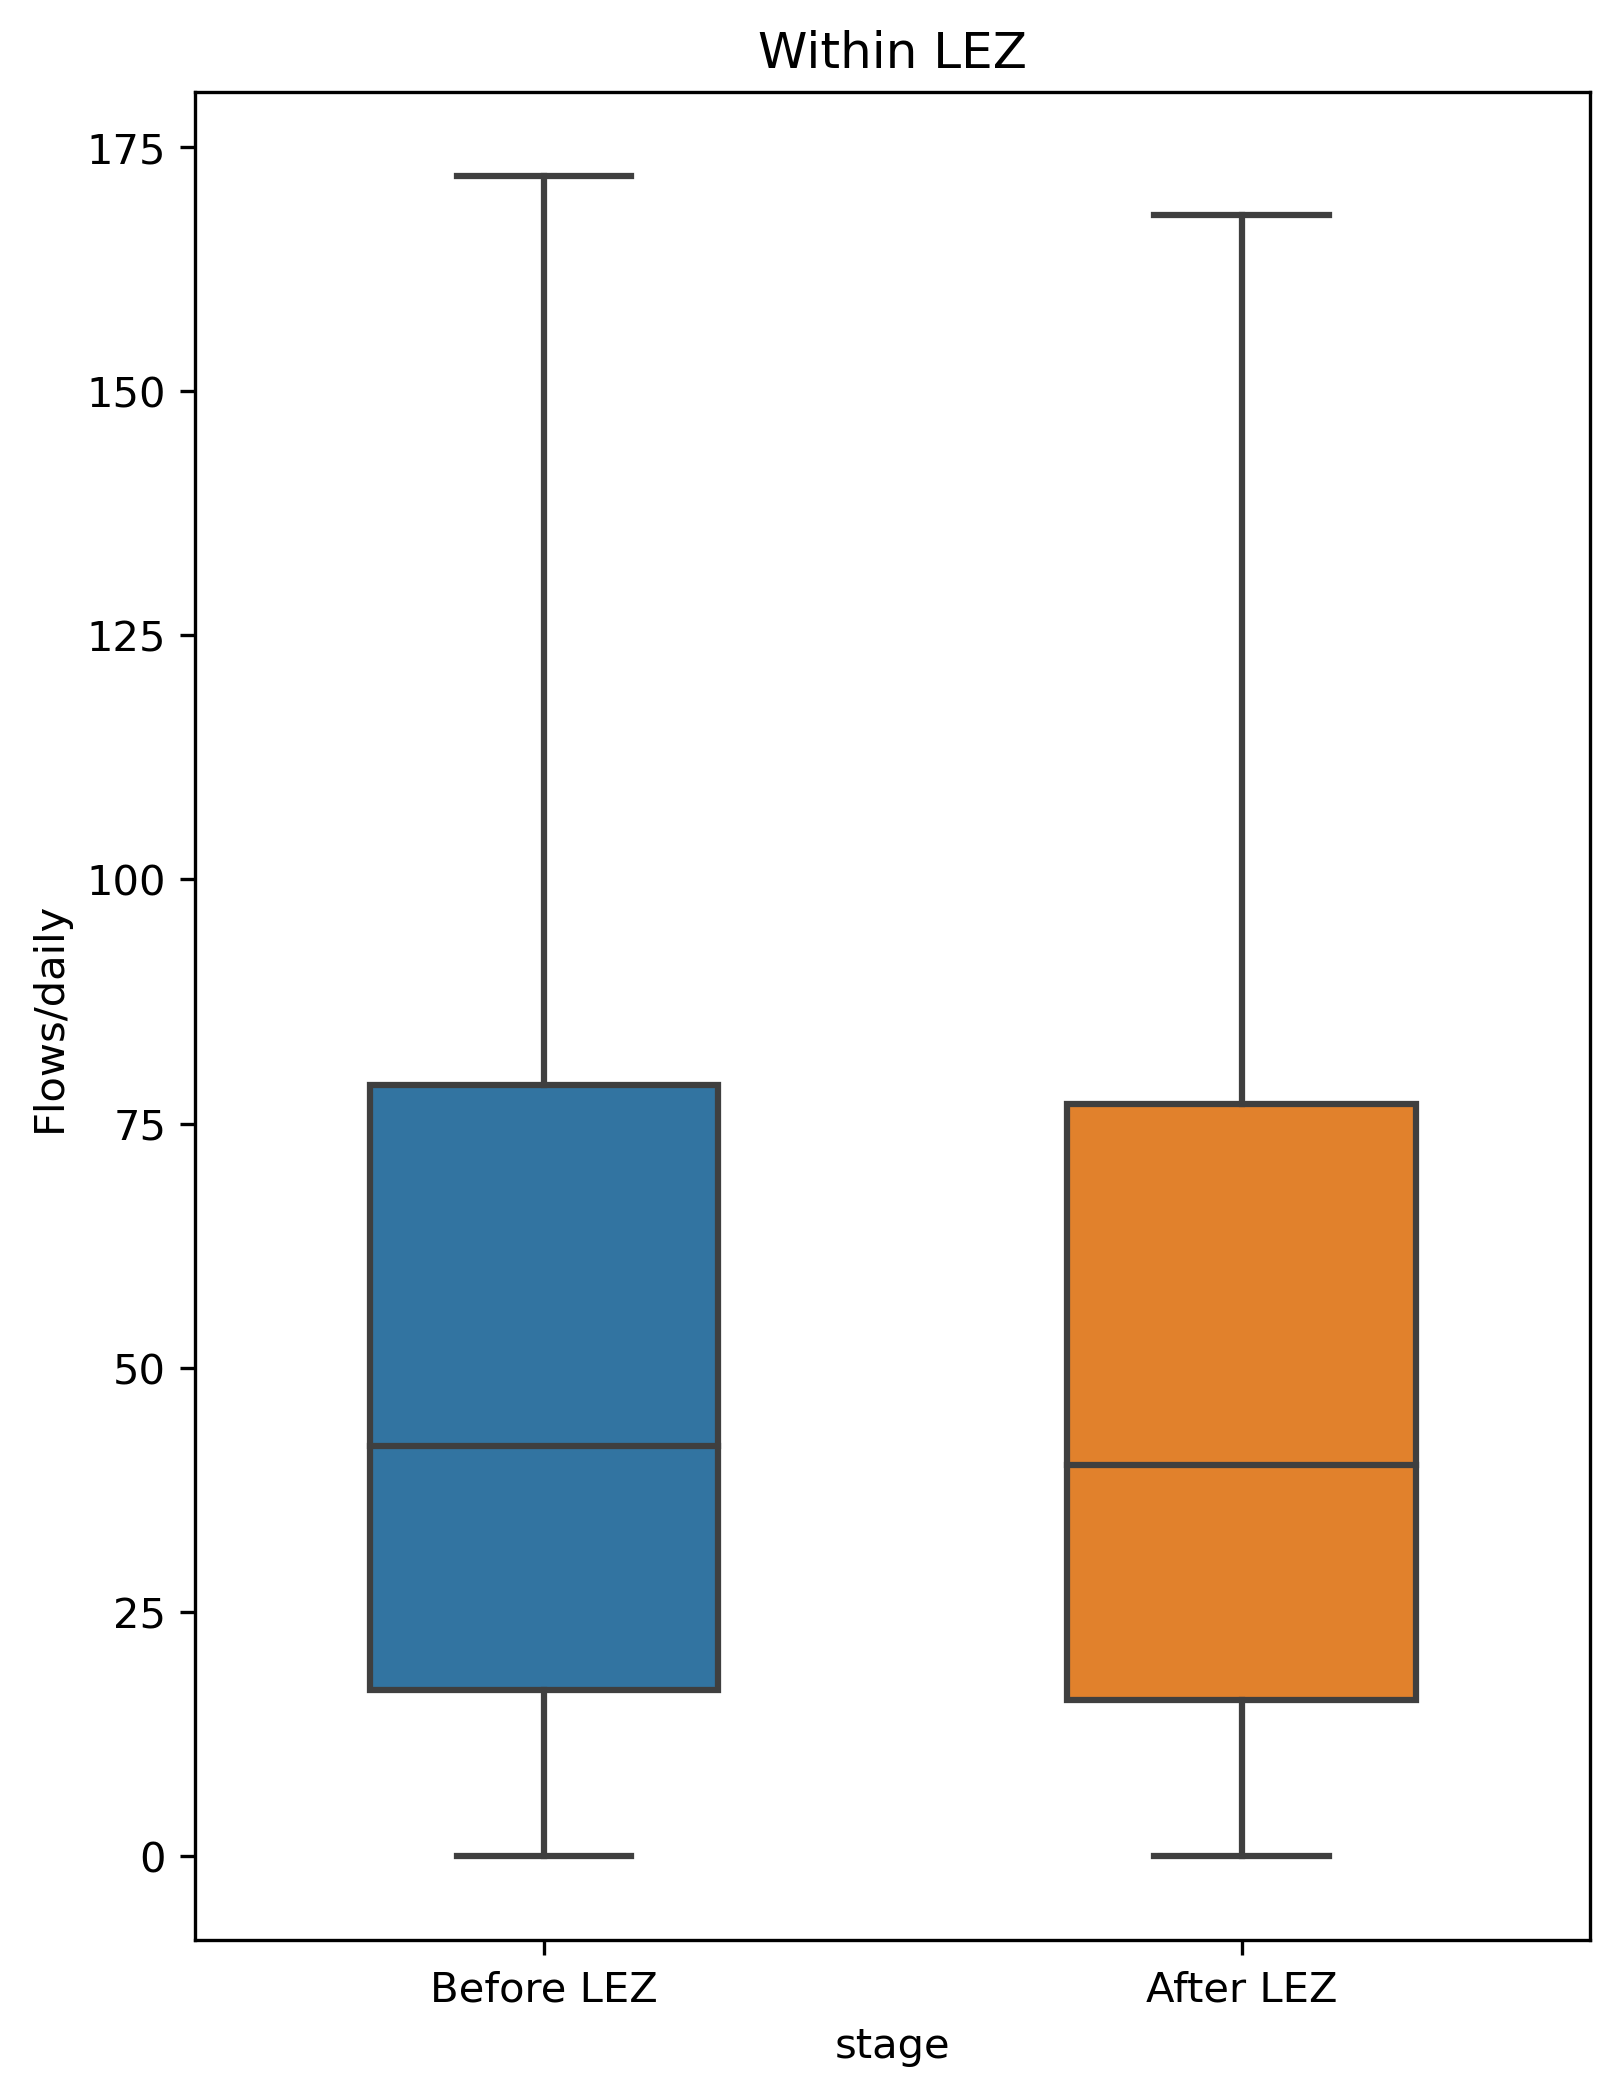

In [100]:
plot_on_stage(data_daily_LEZ, 'daily', 'Within LEZ')

In [111]:
plot_on_detector(data_daily_LEZ, 'daily', 'Within LEZ', 10, 0.2)

E:\program\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



In [110]:
plot_on_detector(data_hourly_LEZ, 'hourly', 'Within LEZ', 5, 0.4)

E:\program\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



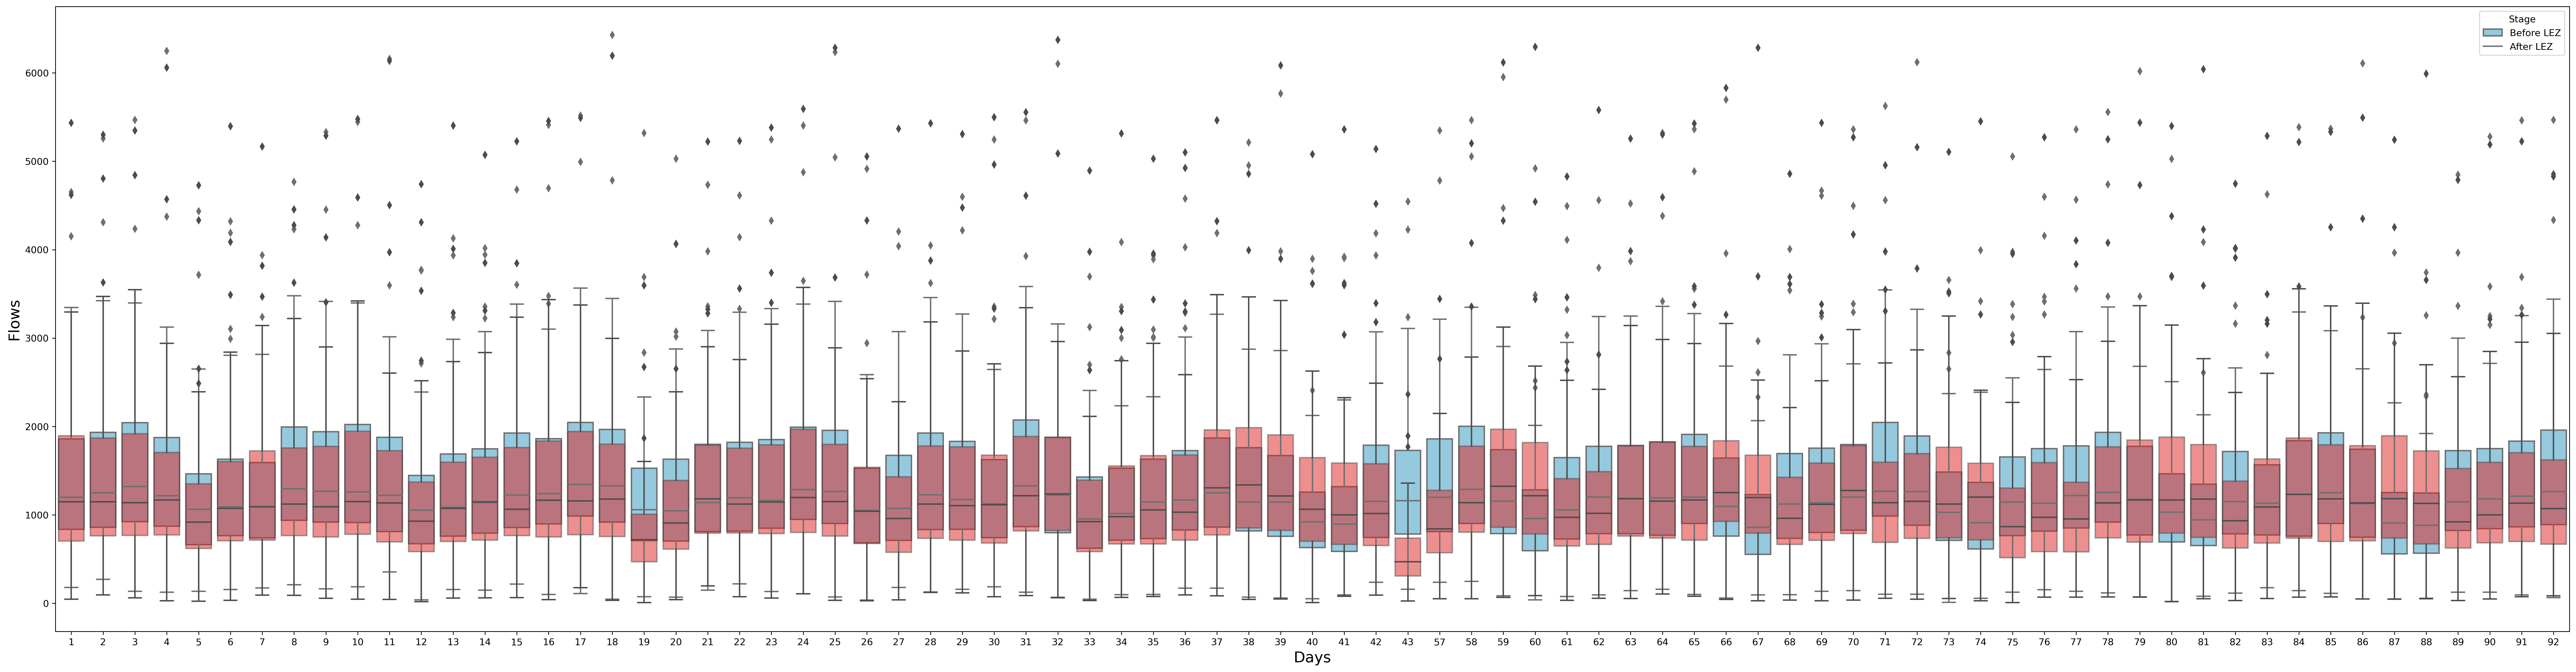

In [43]:
plot_on_time(data_daily_LEZ, 48, 12)

In [34]:
#plot_on_time(data_mix_new, 200, 12)

In [ ]:
# calculate the sum of traffic flow of each day and plot by timestamp
# calculate the hourly average of each day and plot by timestamp
# seperate data into within or outside LEZ as x-axis, and plot two boxs only or 671 of two boxs

In [ ]:
fig = px.line(agr_30, 'timeStamp', 'flow',title='15-min traffic flows')
fig.show()

In [ ]:
# Plot 671 data in each box with timestamp as x-axis
# Plot all before/after LEZ in each box with 671 data as x-axis

# seperate data into within or outside LEZ as x-axis, and plot two boxs